In [1]:
# 필요 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/2022교량현황(2차전처리).csv'
df = pd.read_csv(csvFile, encoding = 'utf-8')
df.head()

,시설명,시도,시군구,총길이,총폭,경간수,최대경간장,상부구조,설계하중,교통량,준공년도,준공후경과년수
0,가남JCT육교(강릉),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29
1,가남JCT육교(인천),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29
2,가남교(강릉0),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20
3,가남교(강릉1),경기도,여주군,25.0,5.6,1,25.0,PSCI거더교,DB-24,61826.0,2010,13
4,가남교(인천),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시설명      7373 non-null   object 
 1   시도       7373 non-null   object 
 2   시군구      7373 non-null   object 
 3   총길이      7373 non-null   float64
 4   총폭       7373 non-null   float64
 5   경간수      7373 non-null   int64  
 6   최대경간장    7373 non-null   float64
 7   상부구조     7373 non-null   object 
 8   설계하중     7373 non-null   object 
 9   교통량      5333 non-null   float64
 10  준공년도     7373 non-null   int64  
 11  준공후경과년수  7373 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 691.3+ KB


## 1. 교통량의 결측값을 평균대체하여 진행한 경우

In [4]:
# 별도의 변수에 데이터프레임 저장후 시각화 진행
new_df = df.copy()
new_df.head()

,시설명,시도,시군구,총길이,총폭,경간수,최대경간장,상부구조,설계하중,교통량,준공년도,준공후경과년수
0,가남JCT육교(강릉),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29
1,가남JCT육교(인천),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29
2,가남교(강릉0),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20
3,가남교(강릉1),경기도,여주군,25.0,5.6,1,25.0,PSCI거더교,DB-24,61826.0,2010,13
4,가남교(인천),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20


In [5]:
# 불필요컬럼 삭제
new_df.drop(['시군구', '총길이', '총폭', '최대경간장'], axis = 1, inplace =  True)

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시설명      7373 non-null   object 
 1   시도       7373 non-null   object 
 2   경간수      7373 non-null   int64  
 3   상부구조     7373 non-null   object 
 4   설계하중     7373 non-null   object 
 5   교통량      5333 non-null   float64
 6   준공년도     7373 non-null   int64  
 7   준공후경과년수  7373 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 460.9+ KB


In [7]:
# 대체값 선정 고민
new_df['교통량'].mean()

33110.2838927433

In [8]:
# 평균을 대체값으로 선택
new_df['교통량'].fillna(new_df['교통량'].mean(), inplace = True)

In [9]:
# 교통량 데이터타입 변경
new_df['교통량'] = new_df['교통량'].astype(int)

In [10]:
# 사용년수에 따른 교통량 합계

def category_year(myYear):
    if myYear < 5:
        return '5년 미만'
    elif myYear < 10:
        return '5년 이상 10년 미만'
    elif myYear < 15:
        return '10년 이상 15년 미만'
    elif myYear < 20:
        return '15년 이상 20년 미만'
    elif myYear < 25:
        return '20년 이상 25년 미만'
    else:
        return '25년 이상'

In [11]:
new_df['Cum_year'] = new_df['준공후경과년수'].apply(lambda x: category_year(x))

In [12]:
# 준공 후 경과년수별 교통량평균 확인
mean_Cumyear = new_df[['Cum_year', '교통량']].groupby(['Cum_year'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_Cumyear

,Cum_year,교통량
0,20년 이상 25년 미만,37773.272289
1,10년 이상 15년 미만,35150.920561
2,25년 이상,33889.222033
3,5년 미만,30959.209677
4,15년 이상 20년 미만,30476.004525
5,5년 이상 10년 미만,26180.706041


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\873723986.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


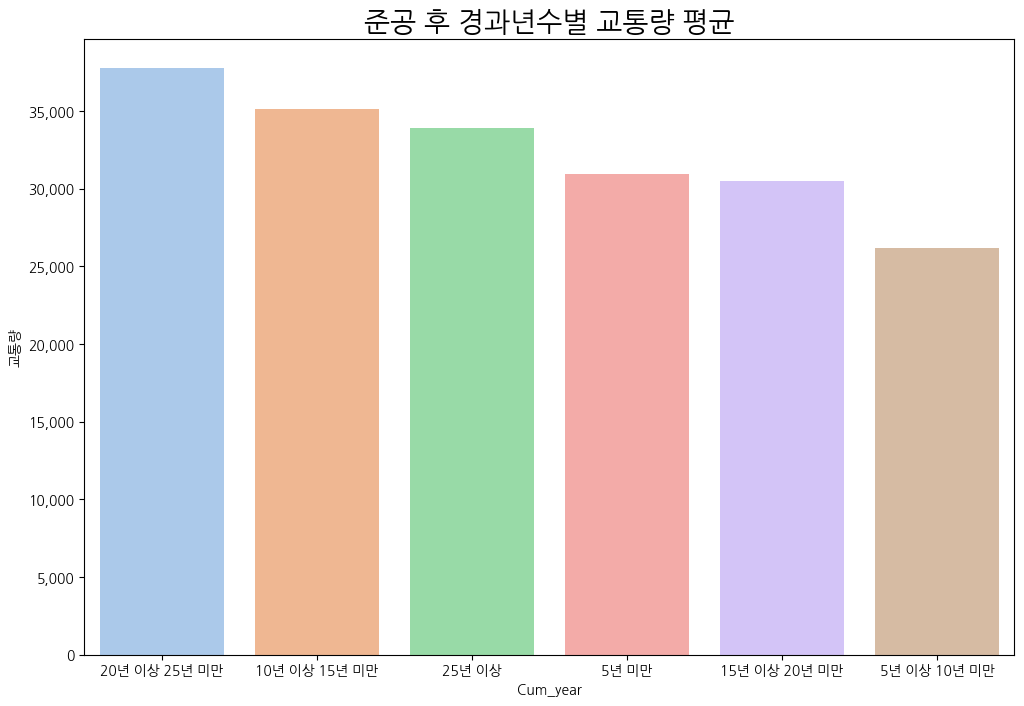

In [13]:
# 준공 후 경과년수별 교통량평균 그래프 확인
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Cum_year', y = '교통량', palette = 'pastel', data = mean_Cumyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('준공 후 경과년수별 교통량 평균', fontsize = 20)
plt.show()

In [14]:
# 상부구조별 교통량합계 확인(범주화를 하지 않음)
mean_structure = new_df[['상부구조', '교통량']].groupby(['상부구조'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,상부구조,교통량
0,RC중공슬래브교,55438.742268
1,강플레이트거더교,46371.152941
2,프리플렉스거더교,44011.634361
3,PSC박스거더교,39714.361538
4,강박스거더교,39292.271896
5,엑스트라도즈드교,37962.666667
6,라멘교,33879.364449
7,아치교,33186.346939
8,PSCI거더교,32646.486219
9,기타,28914.658537


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\2091241671.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


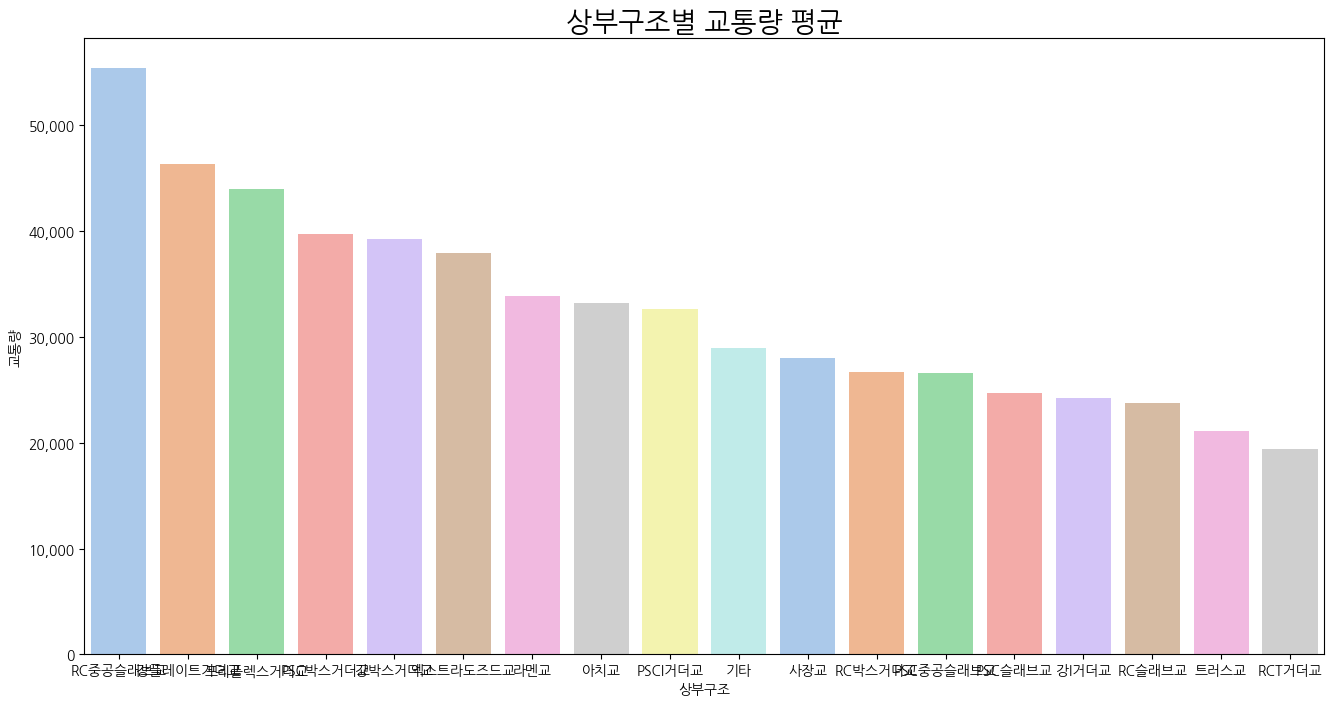

In [15]:
# 상부구조별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '상부구조', y = '교통량', palette = 'pastel', data = mean_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 교통량 평균', fontsize = 20)
plt.show()

In [16]:
# 궁금해서 일부러 범주화를 하지 않았지만, 이름이 길어 뚜렷하게 보기 힘들다 판단,
# 큰 항목만을 묶어서 범주화
def category_struc(struc):
    if struc.endswith('거더교'):
        return '거더교'
    elif struc.endswith('슬래브교'):
        return '슬래브교'
    elif struc.endswith('라멘교'):
        return '라멘교'
    elif struc.endswith('사장교'):
        return '사장교'
    elif struc.endswith('아치교'):
        return '아치교'
    elif struc.endswith('트러스트교'):
        return '트러스트교'
    else:
        return '기타'

In [17]:
new_df['New_Struc'] = new_df['상부구조'].apply(lambda x: category_struc(x))

In [18]:
new_df.head()

,시설명,시도,경간수,상부구조,설계하중,교통량,준공년도,준공후경과년수,Cum_year,New_Struc
0,가남JCT육교(강릉),경기도,5,강박스거더교,DB-24,24562,1994,29,25년 이상,거더교
1,가남JCT육교(인천),경기도,5,강박스거더교,DB-24,24562,1994,29,25년 이상,거더교
2,가남교(강릉0),경기도,1,프리플렉스거더교,DB-24,61826,2003,20,20년 이상 25년 미만,거더교
3,가남교(강릉1),경기도,1,PSCI거더교,DB-24,61826,2010,13,10년 이상 15년 미만,거더교
4,가남교(인천),경기도,1,프리플렉스거더교,DB-24,61826,2003,20,20년 이상 25년 미만,거더교


In [19]:
# 새로운 상부구조별 교통량평균 확인
mean_structure = new_df[['New_Struc', '교통량']].groupby(['New_Struc'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,New_Struc,교통량
0,거더교,36362.982335
1,라멘교,33879.364449
2,아치교,33186.346939
3,기타,29004.625000
4,사장교,28016.090909
5,슬래브교,25780.415805


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\1257680457.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


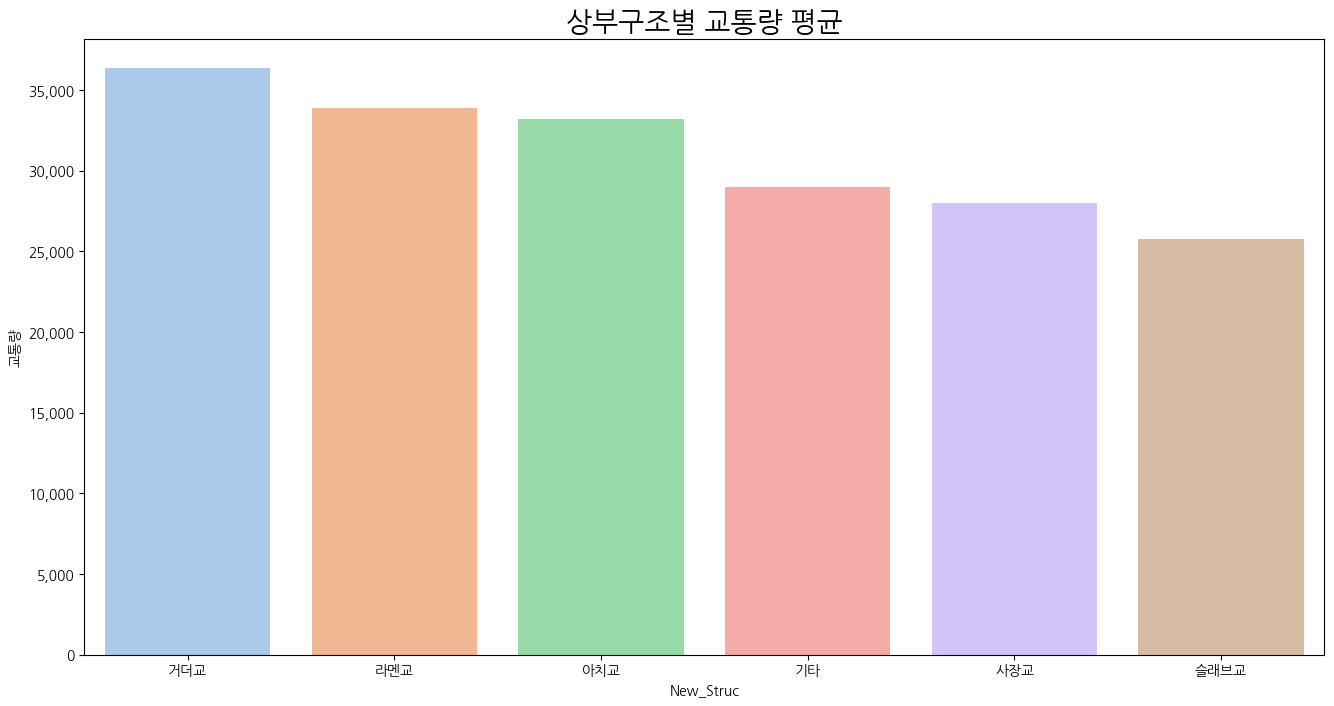

In [20]:
# 새로운 상부구조별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', palette = 'pastel', data = mean_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 교통량 평균', fontsize = 20)
plt.show()

In [21]:
# 설계하중별 교통량
def category_weight(weight):
    if weight == 'DB-24':
        return '1등교'
    elif weight == 'DB-18':
        return '2등교'
    elif weight == 'DB-13.5':
        return '3등교'
    else:
        return '기타'

In [22]:
new_df['New_Weight'] = new_df['설계하중'].apply(lambda x: category_weight(x))

In [23]:
new_df.head()

,시설명,시도,경간수,상부구조,설계하중,교통량,준공년도,준공후경과년수,Cum_year,New_Struc,New_Weight
0,가남JCT육교(강릉),경기도,5,강박스거더교,DB-24,24562,1994,29,25년 이상,거더교,1등교
1,가남JCT육교(인천),경기도,5,강박스거더교,DB-24,24562,1994,29,25년 이상,거더교,1등교
2,가남교(강릉0),경기도,1,프리플렉스거더교,DB-24,61826,2003,20,20년 이상 25년 미만,거더교,1등교
3,가남교(강릉1),경기도,1,PSCI거더교,DB-24,61826,2010,13,10년 이상 15년 미만,거더교,1등교
4,가남교(인천),경기도,1,프리플렉스거더교,DB-24,61826,2003,20,20년 이상 25년 미만,거더교,1등교


In [24]:
# 새로운 설계하중별 교통량평균 확인
mean_weight = new_df[['New_Weight', '교통량']].groupby(['New_Weight'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_weight

,New_Weight,교통량
0,1등교,34629.094475
1,기타,25692.458333
2,2등교,22693.415686
3,3등교,13481.570681


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\2381205551.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


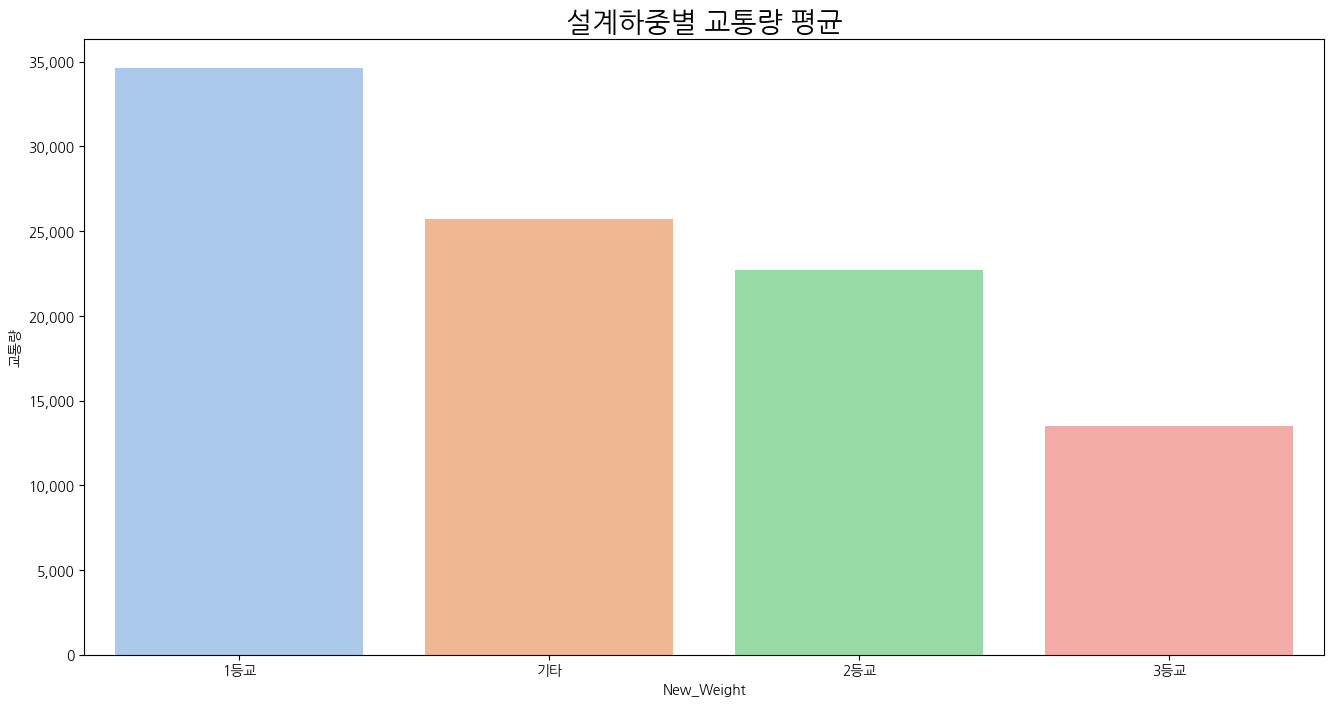

In [25]:
# 새로운 상부구조별 교통량평균 그래프 확인
# 추후에 기타, 미상 교량을 제외한다해도 단순지표로써 유의미한 인사이트를 제공할 것 같지는 않음
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Weight', y = '교통량', palette = 'pastel', data = mean_weight)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중별 교통량 평균', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\3084915712.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


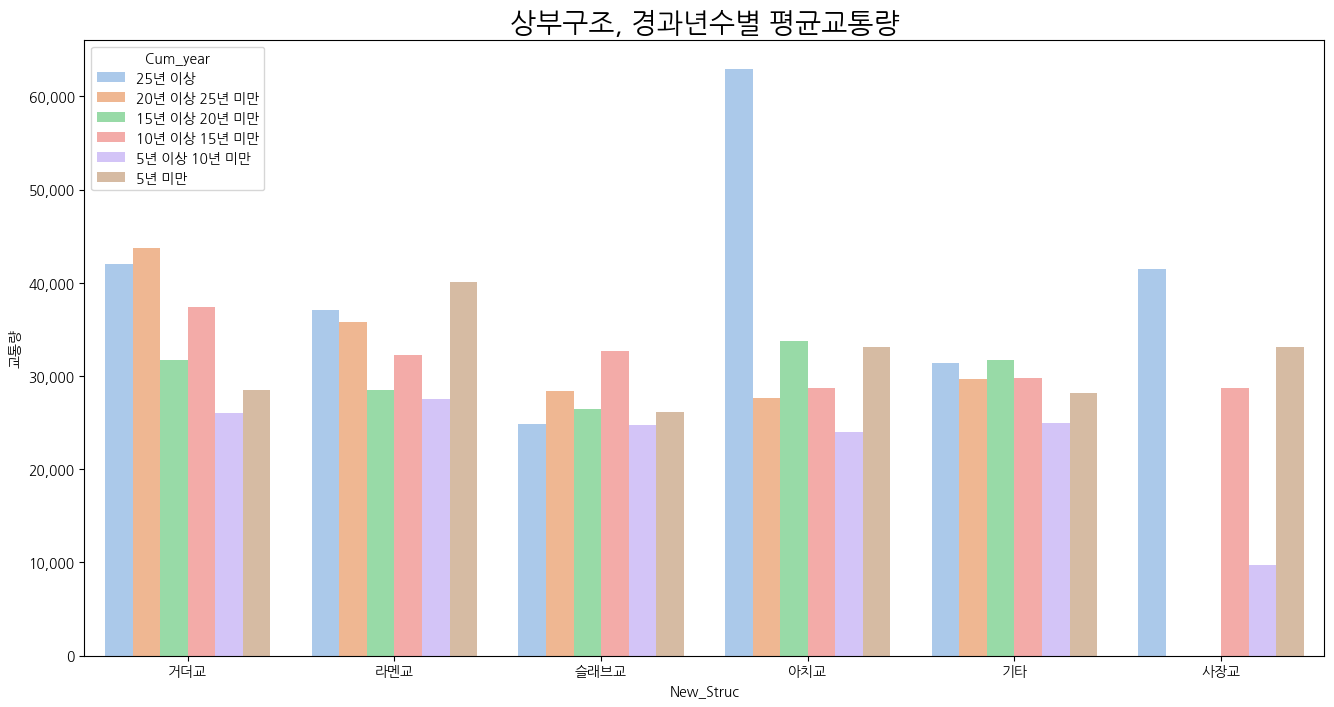

In [26]:
# 상부구조, 경과년수별 교통량
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = new_df, errorbar = None,
            hue_order = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조, 경과년수별 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\2371840052.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


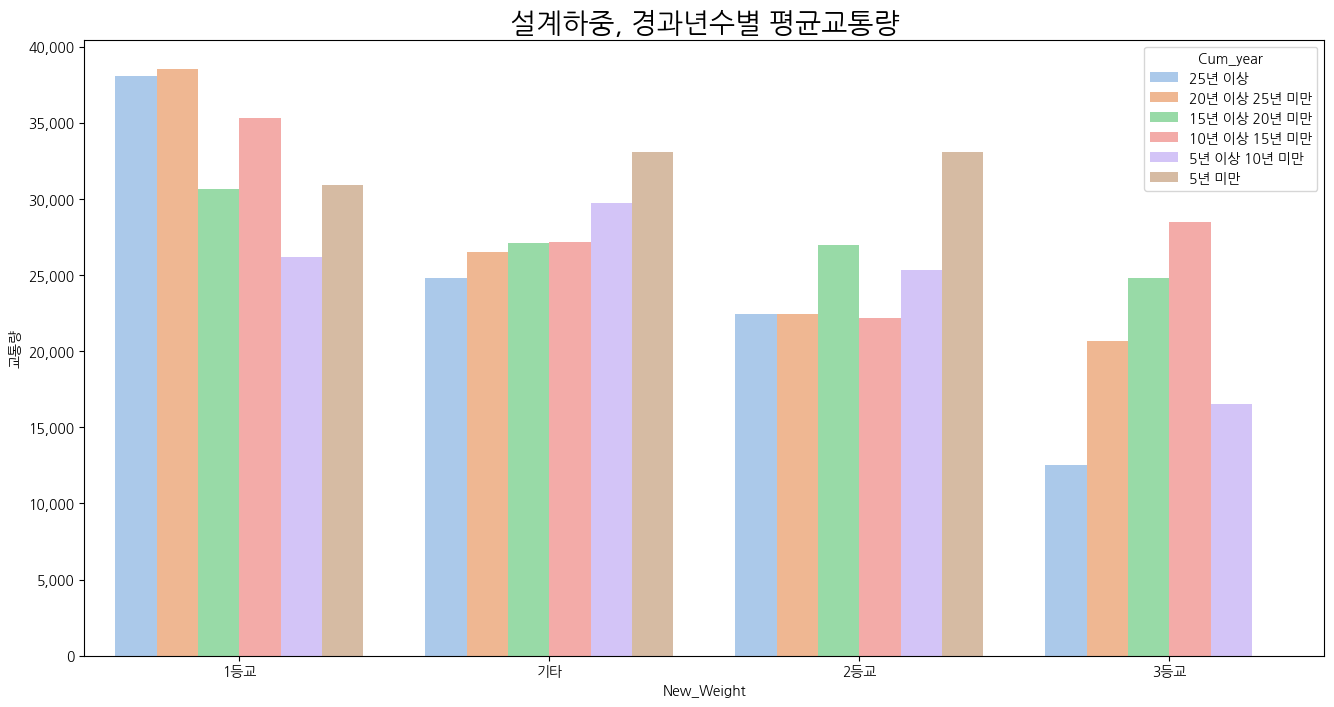

In [27]:
# 설계하중, 경과년수별 교통량
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Weight', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = new_df, errorbar = None,
            hue_order = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중, 경과년수별 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\462551317.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


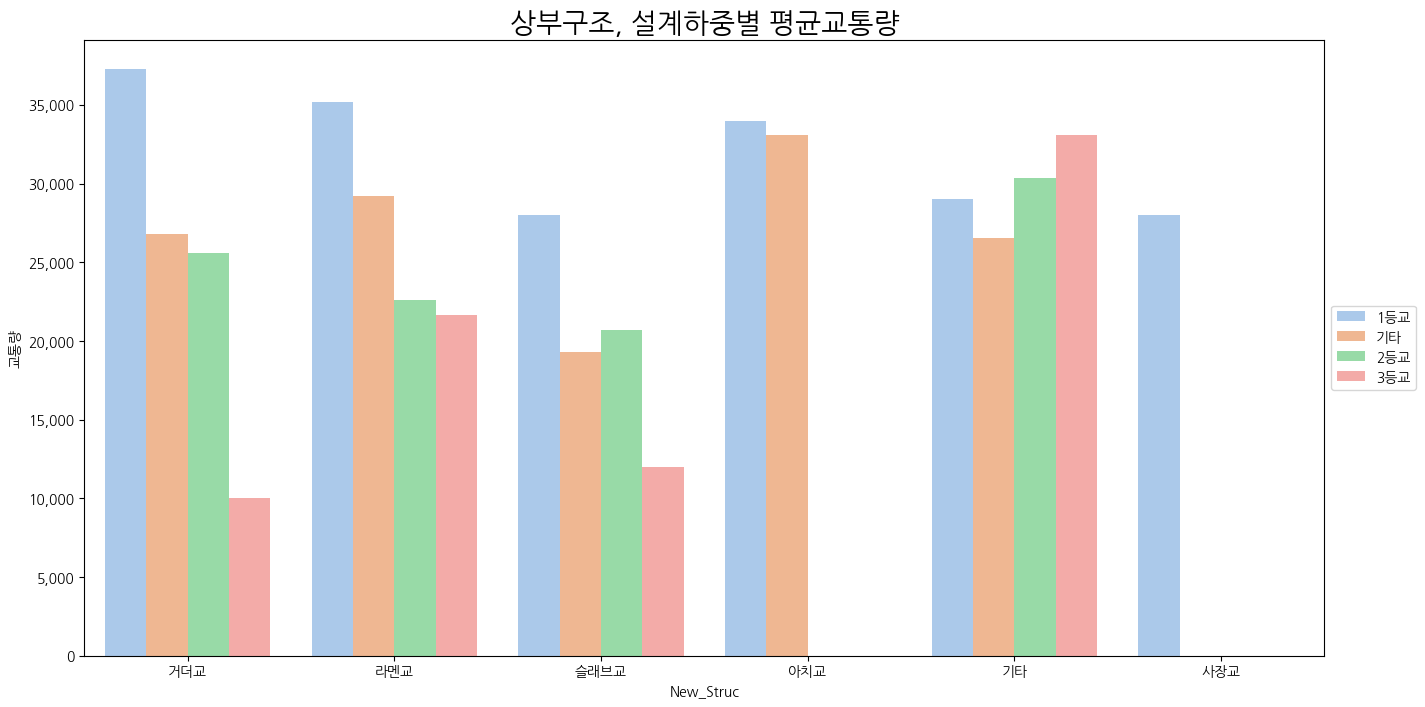

In [28]:
# 상부구조, 설계하중별 교통량
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', hue = 'New_Weight', palette = 'pastel', data = new_df, errorbar = None)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조, 설계하중별 평균교통량', fontsize = 20)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\3851693360.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


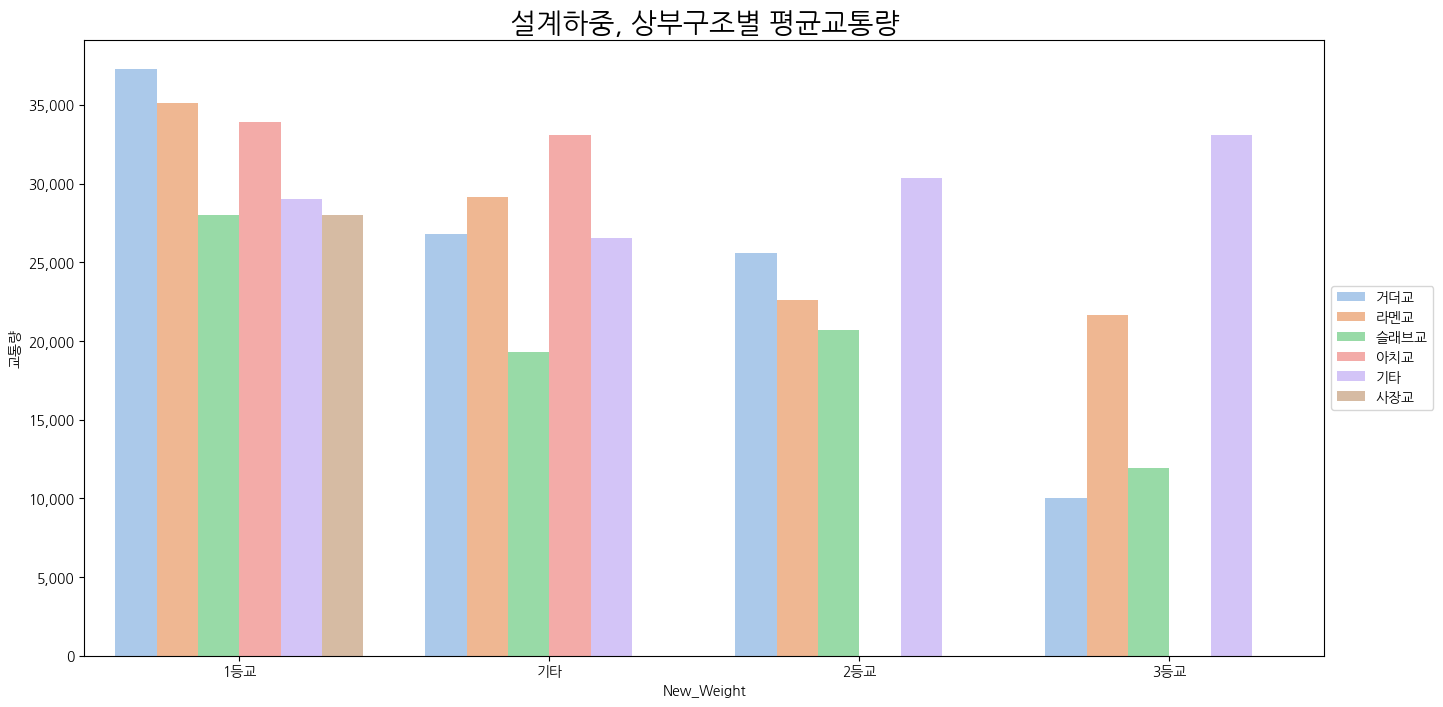

In [29]:
# 설계하중, 상부구조별 교통량(위 그래프에서 x축만 바꾼것)
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Weight', y = '교통량', hue = 'New_Struc', palette = 'pastel', data = new_df, errorbar = None)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중, 상부구조별 평균교통량', fontsize = 20)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

## 2. 결측값을 제거 후 시각화를 진행한 경우

In [30]:
# new_df에 df복사
new_df = df.copy()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시설명      7373 non-null   object 
 1   시도       7373 non-null   object 
 2   시군구      7373 non-null   object 
 3   총길이      7373 non-null   float64
 4   총폭       7373 non-null   float64
 5   경간수      7373 non-null   int64  
 6   최대경간장    7373 non-null   float64
 7   상부구조     7373 non-null   object 
 8   설계하중     7373 non-null   object 
 9   교통량      5333 non-null   float64
 10  준공년도     7373 non-null   int64  
 11  준공후경과년수  7373 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 691.3+ KB


In [31]:
# 결측치 제거
new_df.dropna(axis = 0, how = 'any', inplace = True)

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5333 entries, 0 to 7368
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시설명      5333 non-null   object 
 1   시도       5333 non-null   object 
 2   시군구      5333 non-null   object 
 3   총길이      5333 non-null   float64
 4   총폭       5333 non-null   float64
 5   경간수      5333 non-null   int64  
 6   최대경간장    5333 non-null   float64
 7   상부구조     5333 non-null   object 
 8   설계하중     5333 non-null   object 
 9   교통량      5333 non-null   float64
 10  준공년도     5333 non-null   int64  
 11  준공후경과년수  5333 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 541.6+ KB


In [33]:
# 교통량 데이터타입 변경
new_df['교통량'] = new_df['교통량'].astype(int)

In [34]:
# 경과년수 함수 사용
new_df['Cum_year'] = new_df['준공후경과년수'].apply(lambda x: category_year(x))

In [35]:
# 준공 후 경과년수별 교통량평균 확인
mean_Cumyear = new_df[['Cum_year', '교통량']].groupby(['Cum_year'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_Cumyear

,Cum_year,교통량
0,20년 이상 25년 미만,39359.487621
1,10년 이상 15년 미만,35826.150498
2,25년 이상,34304.211569
3,5년 미만,30469.425743
4,15년 이상 20년 미만,29280.309211
5,5년 이상 10년 미만,25204.046296


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\873723986.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


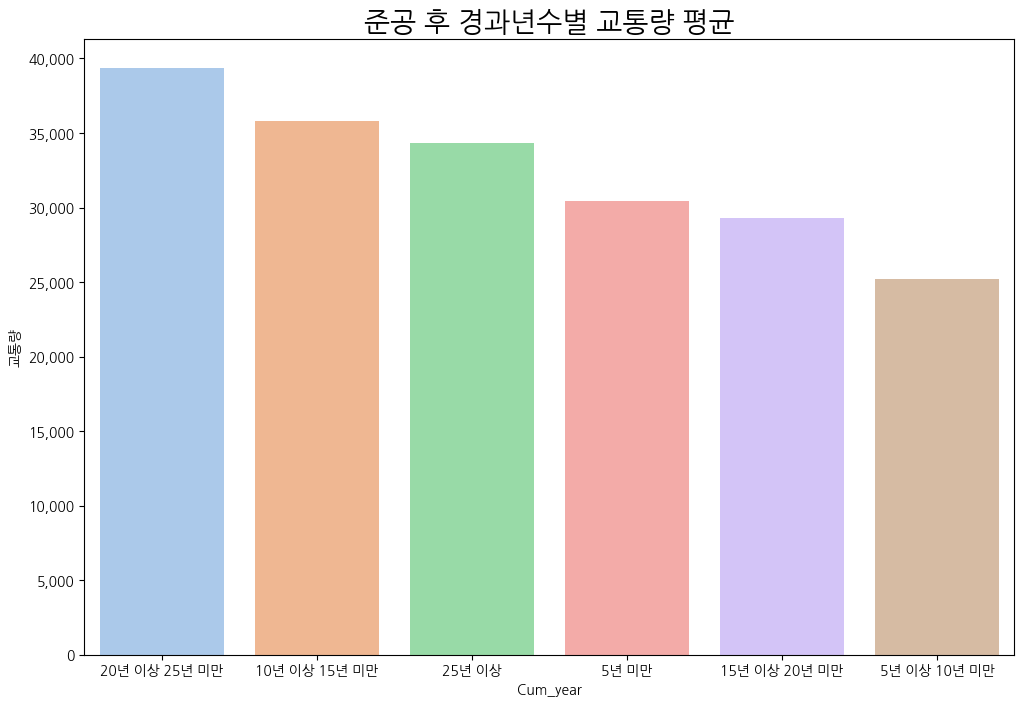

In [36]:
# 준공 후 경과년수별 교통량평균 그래프 확인
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Cum_year', y = '교통량', palette = 'pastel', data = mean_Cumyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('준공 후 경과년수별 교통량 평균', fontsize = 20)
plt.show()

In [37]:
# 상부구조별 교통량합계 확인(범주화를 하지 않음)
mean_structure = new_df[['상부구조', '교통량']].groupby(['상부구조'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,상부구조,교통량
0,RC중공슬래브교,58894.380952
1,강플레이트거더교,52215.050847
2,프리플렉스거더교,47972.888889
3,PSC박스거더교,41782.393939
4,강박스거더교,40619.086957
5,엑스트라도즈드교,40389.000000
6,라멘교,34145.660647
7,아치교,33248.555556
8,PSCI거더교,32582.771704
9,사장교,25105.285714


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\2091241671.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


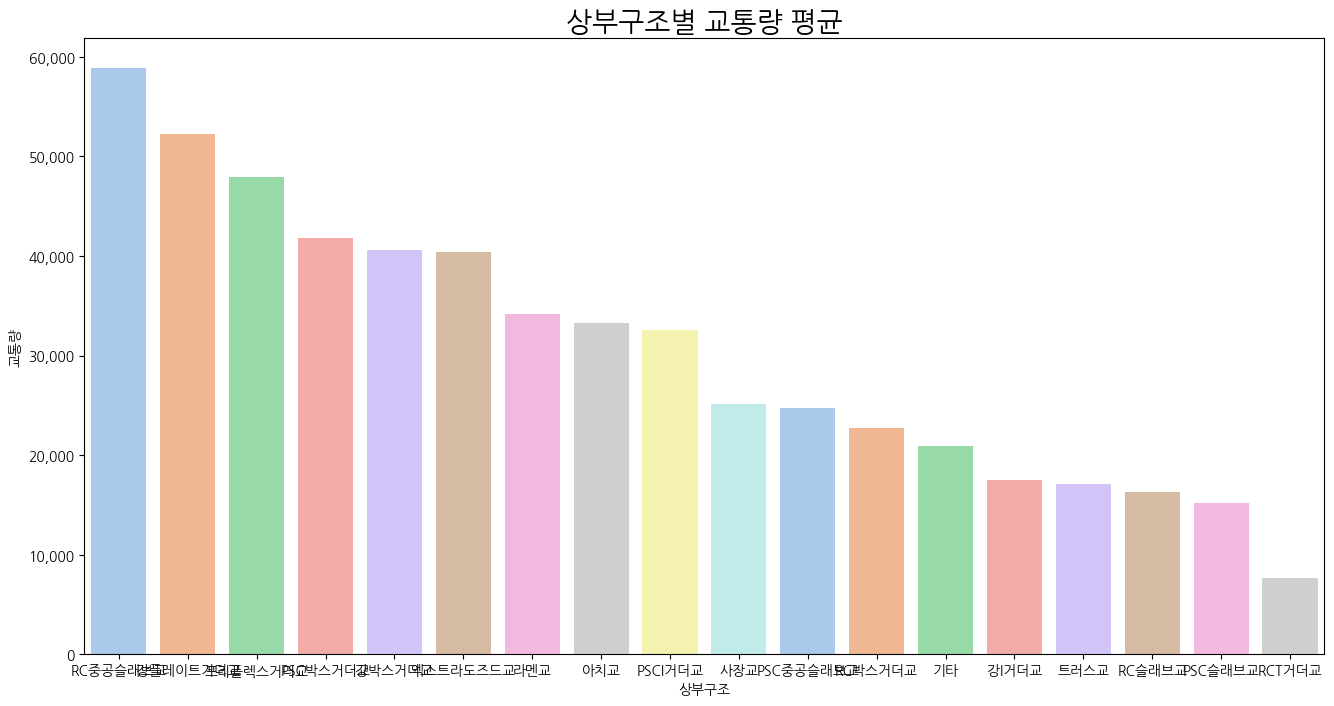

In [38]:
# 상부구조별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '상부구조', y = '교통량', palette = 'pastel', data = mean_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 교통량 평균', fontsize = 20)
plt.show()

In [39]:
new_df['New_Struc'] = new_df['상부구조'].apply(lambda x: category_struc(x))

In [40]:
new_df.head()

,시설명,시도,시군구,총길이,총폭,경간수,최대경간장,상부구조,설계하중,교통량,준공년도,준공후경과년수,Cum_year,New_Struc
0,가남JCT육교(강릉),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562,1994,29,25년 이상,거더교
1,가남JCT육교(인천),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562,1994,29,25년 이상,거더교
2,가남교(강릉0),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826,2003,20,20년 이상 25년 미만,거더교
3,가남교(강릉1),경기도,여주군,25.0,5.6,1,25.0,PSCI거더교,DB-24,61826,2010,13,10년 이상 15년 미만,거더교
4,가남교(인천),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826,2003,20,20년 이상 25년 미만,거더교


In [41]:
# 새로운 상부구조별 교통량평균 확인
mean_structure = new_df[['New_Struc', '교통량']].groupby(['New_Struc'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,New_Struc,교통량
0,거더교,37115.967029
1,라멘교,34145.660647
2,아치교,33248.555556
3,사장교,25105.285714
4,기타,21686.347826
5,슬래브교,20228.412393


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\1257680457.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


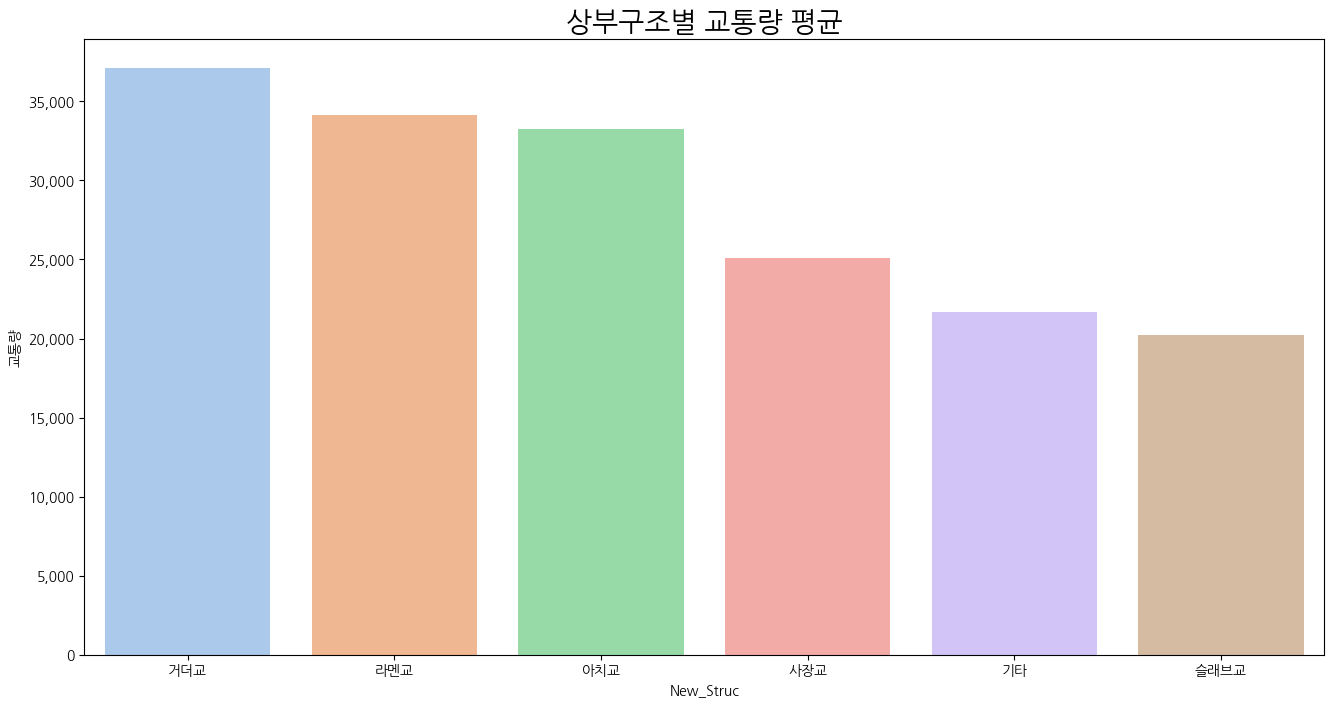

In [42]:
# 새로운 상부구조별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', palette = 'pastel', data = mean_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 교통량 평균', fontsize = 20)
plt.show()

In [43]:
# 설계하중별 교통량
new_df['New_Weight'] = new_df['설계하중'].apply(lambda x: category_weight(x))

In [44]:
# 새로운 설계하중별 교통량평균 확인
mean_weight = new_df[['New_Weight', '교통량']].groupby(['New_Weight'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_weight

,New_Weight,교통량
0,1등교,35111.429117
1,2등교,6940.256158
2,3등교,3590.078740
3,기타,3439.833333


C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\2381205551.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


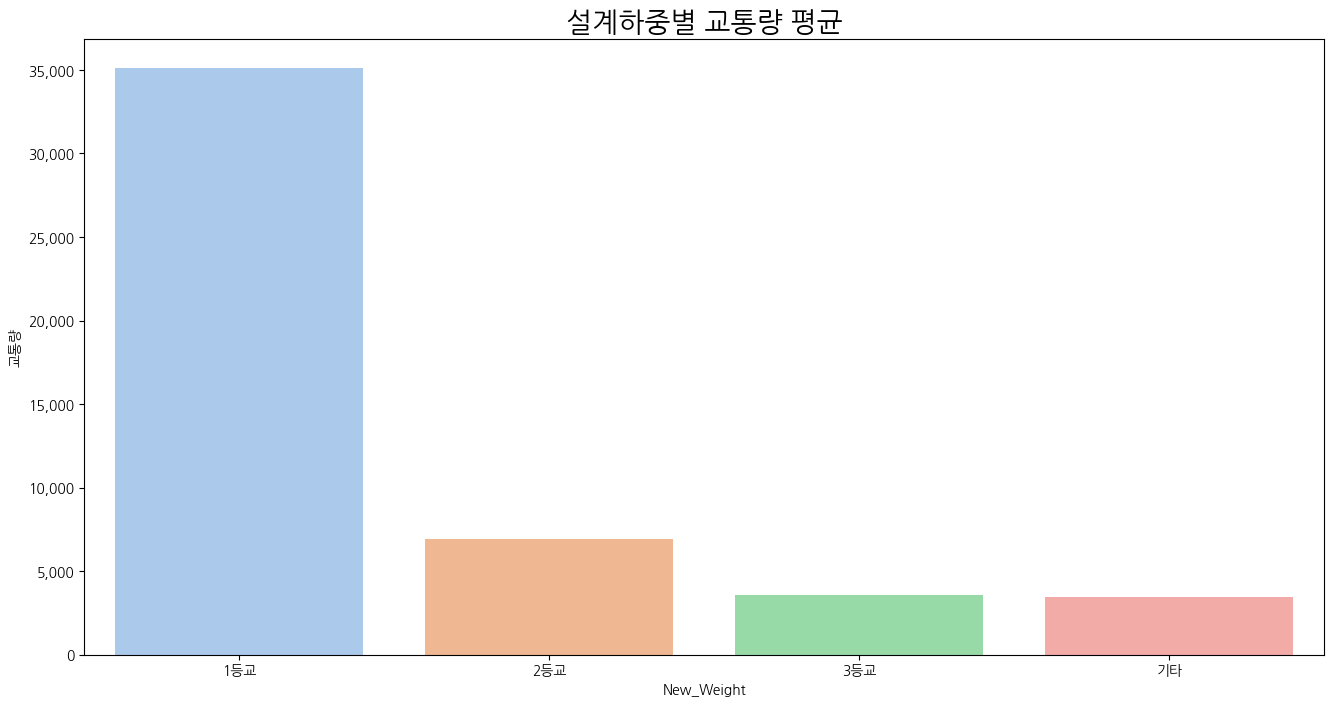

In [45]:
# 새로운 상부구조별 교통량평균 그래프 확인
# 추후에 기타, 미상 교량을 제외한다해도 단순지표로써 유의미한 인사이트를 제공할 것 같지는 않음
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Weight', y = '교통량', palette = 'pastel', data = mean_weight)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중별 교통량 평균', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\3084915712.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


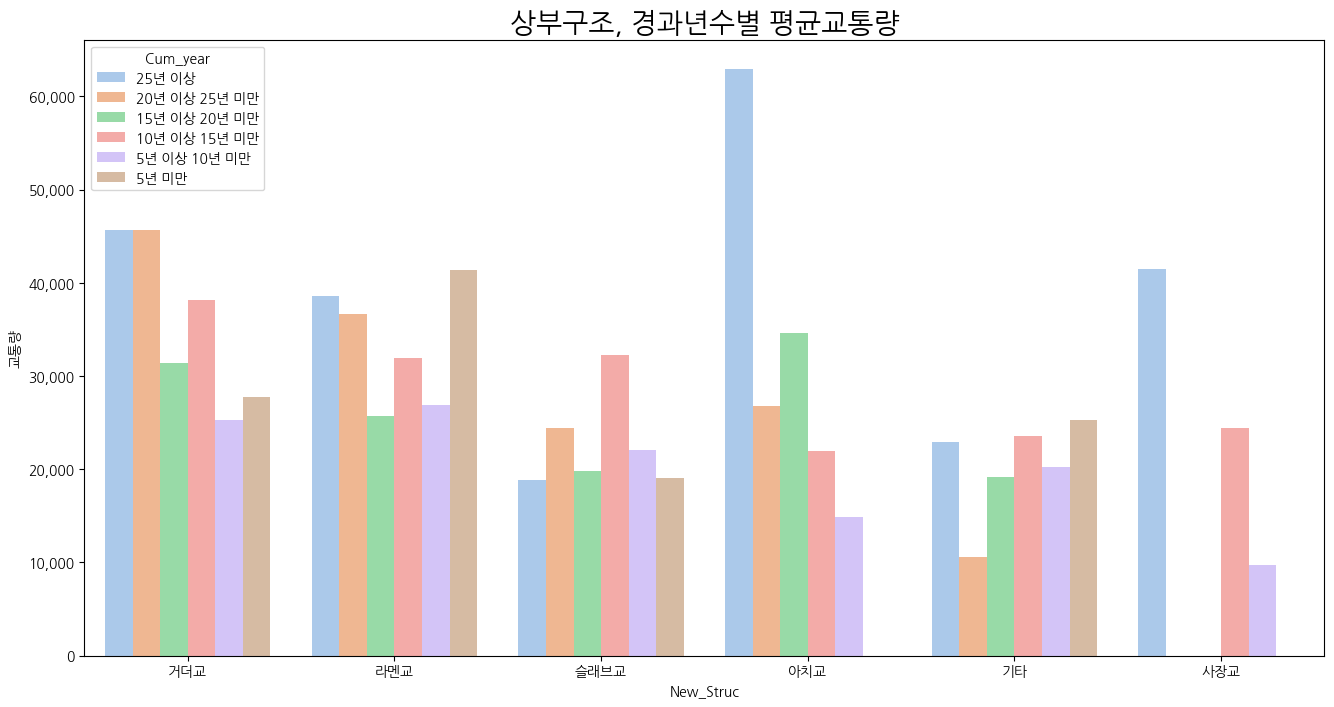

In [46]:
# 상부구조, 경과년수별 교통량
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = new_df, errorbar = None,
            hue_order = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조, 경과년수별 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\2371840052.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


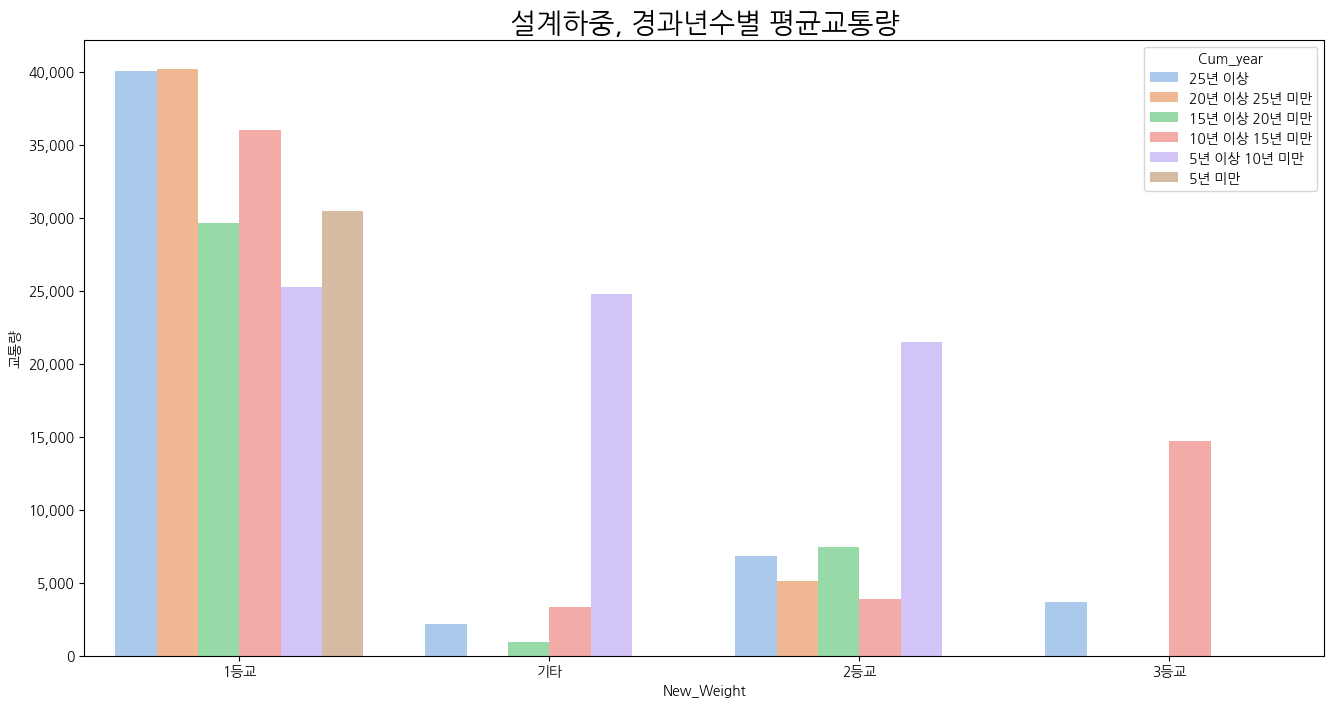

In [47]:
# 설계하중, 경과년수별 교통량
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Weight', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = new_df, errorbar = None,
            hue_order = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중, 경과년수별 평균교통량', fontsize = 20)
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\462551317.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


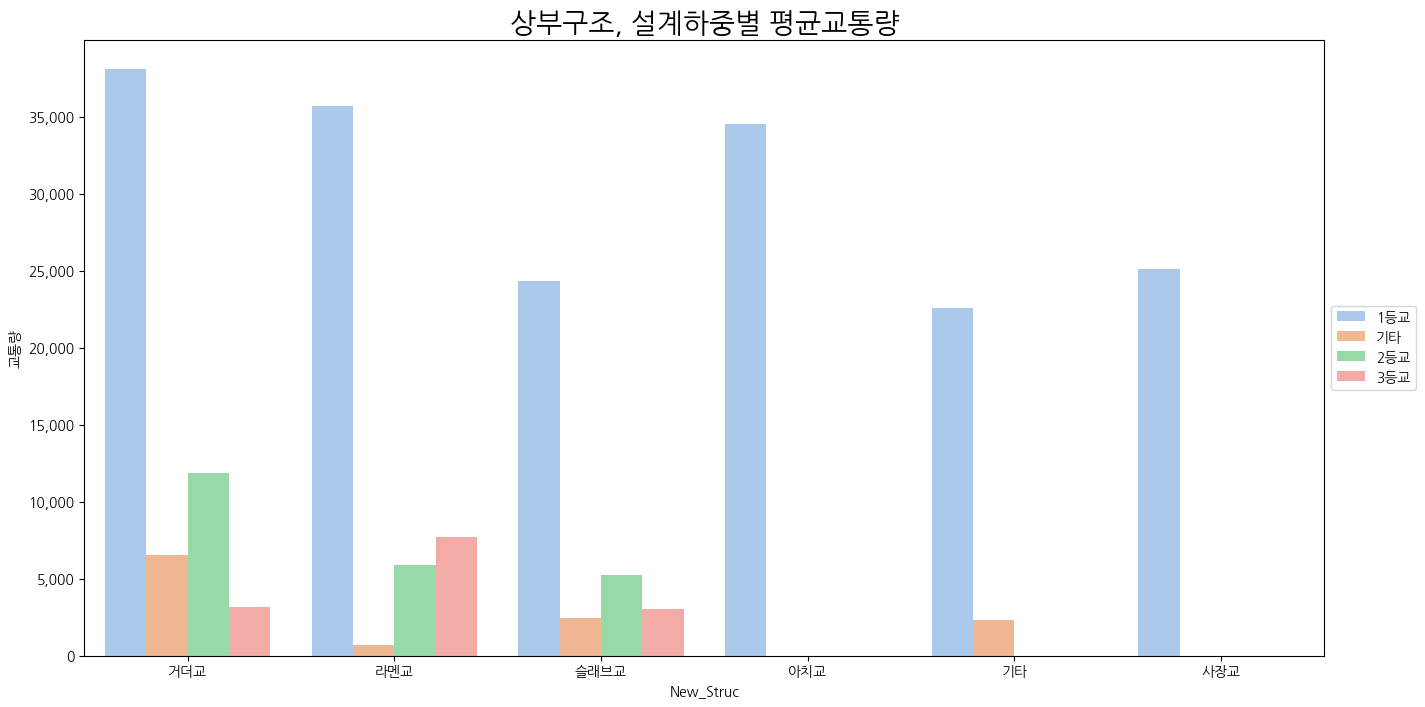

In [48]:
# 상부구조, 설계하중별 교통량
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', hue = 'New_Weight', palette = 'pastel', data = new_df, errorbar = None)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조, 설계하중별 평균교통량', fontsize = 20)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_13252\3851693360.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


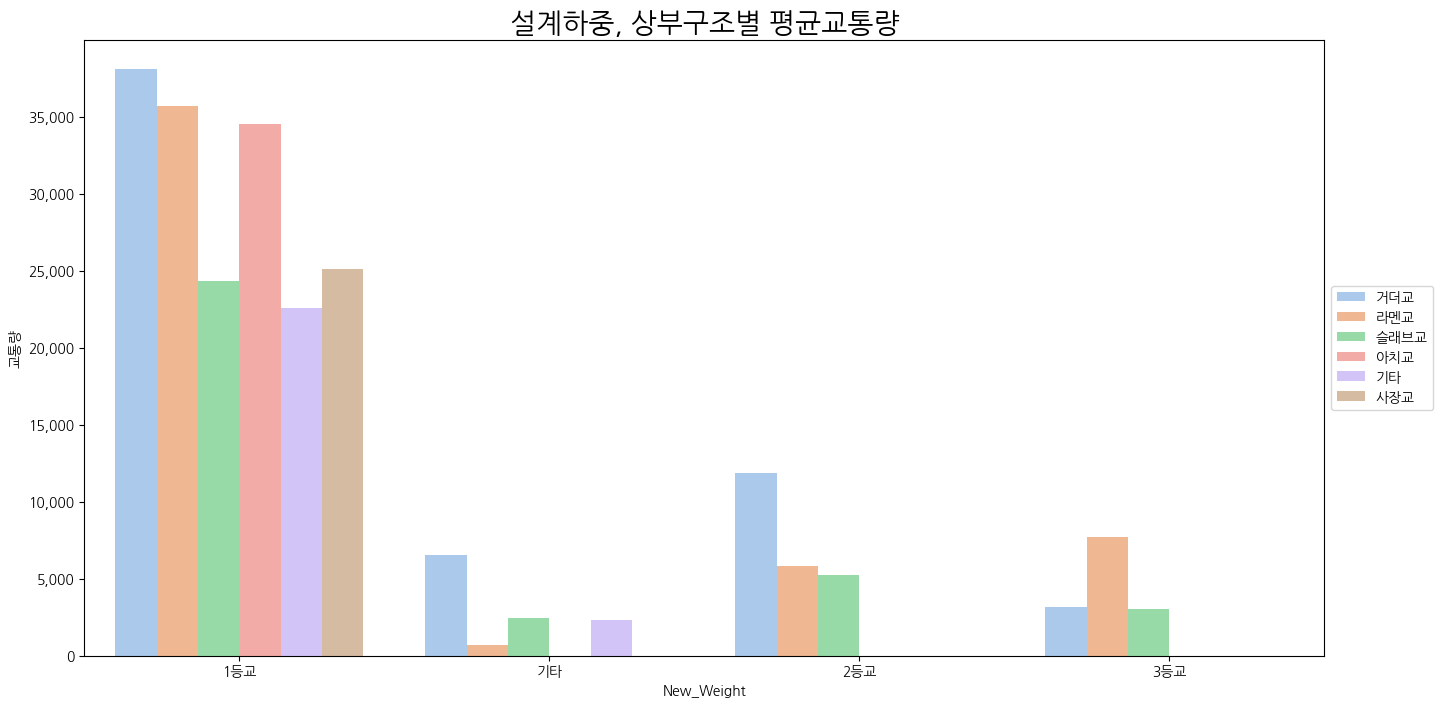

In [49]:
# 설계하중, 상부구조별 교통량(위 그래프에서 x축만 바꾼것)
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Weight', y = '교통량', hue = 'New_Struc', palette = 'pastel', data = new_df, errorbar = None)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('설계하중, 상부구조별 평균교통량', fontsize = 20)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()